In [19]:
from queue import PriorityQueue

class MazeSolver:
    def __init__(self, maze):
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])

    def is_valid_move(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols and self.maze[row][col] != -1

    def bfs(self, start, end):
        visited = [[False for _ in range(self.cols)] for _ in range(self.rows)]
        queue = PriorityQueue()
        path_cost = {}
        total_cost = {}

        queue.put((0, start))
        path_cost[start] = 0
        total_cost[start] = self.heuristic(start, end)

        while not queue.empty():
            current_cost, current = queue.get()

            if current == end:
                break

            row, col = current

            # Dört yöne hareket et
            directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
            for dr, dc in directions:
                new_row, new_col = row + dr, col + dc

                if self.is_valid_move(new_row, new_col):
                    new_cost = path_cost[current] + self.maze[new_row][new_col]

                    if (new_row, new_col) not in path_cost or new_cost < path_cost[(new_row, new_col)]:
                        path_cost[(new_row, new_col)] = new_cost
                        total_cost[(new_row, new_col)] = new_cost + self.heuristic((new_row, new_col), end)
                        queue.put((total_cost[(new_row, new_col)], (new_row, new_col)))

        return self.construct_path(start, end, path_cost)

    def construct_path(self, start, end, path_cost):
        current = end
        shortest_path = []

        while current != start:
            shortest_path.insert(0, current)
            current = min(path_cost, key=lambda x: path_cost[x])

        shortest_path.insert(0, start)
        return shortest_path

    def heuristic(self, current, end):
        # Basit bir Manhattan mesafesi hesapla
        return abs(current[0] - end[0]) + abs(current[1] - end[1])

# Örnek kullanım
maze = [
    [0, 1, 0, 0, 0],
    [0, -1, 0, -1, 0],
    [0, 0, 0, -1, 0],
    [1, -1, 0, 0, 0],
    [0, 0, 0, -1, 0]
]

start_point = (0, 0)
end_point = (4, 4)

solver = MazeSolver(maze)
shortest_path = solver.bfs(start_point, end_point)

print("Shortest Path from {} to {}: {}".format(start_point, end_point, shortest_path))


Shortest Path from (0, 0) to (4, 4): [(0, 0), (4, 4)]


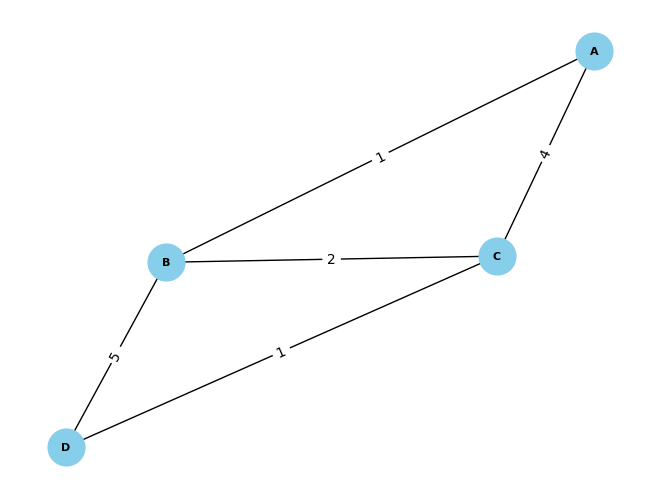

En kısa yol (A -> D): ['A', 'B', 'C', 'D']
Toplam maliyet: 4


In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, font_color='black', font_family='sans-serif')
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

def dijkstra_complex(graph, start, end):
    G = nx.Graph(graph)
    
    # Başlangıç noktasından diğer noktalara olan en kısa yolları hesapla
    shortest_paths = nx.shortest_path(G, source=start, weight='weight')
    
    # Hedef noktaya olan en kısa yolu bul
    shortest_path = shortest_paths[end]
    
    # En kısa yolu oluşturan düğümler arasındaki maliyeti hesapla
    total_cost = sum(G[shortest_path[i]][shortest_path[i + 1]]['weight'] for i in range(len(shortest_path) - 1))
    
    # Hedef düğümün türünü ve kaynak miktarını al
    end_type = G.nodes[end].get('type', 'Unknown Type')
    end_resource = G.nodes[end].get('resource', 'Unknown Resource')
    
    return {
        'shortest_path': shortest_path,
        'total_cost': total_cost,
        'end_type': end_type,
        'end_resource': end_resource
    }

# Örnek bir karmaşık graf tanımla
graph_data = {
    'A': {'B': {'weight': 1, 'type': 'road', 'resource': 10}, 'C': {'weight': 4, 'type': 'air', 'resource': 20}},
    'B': {'A': {'weight': 1, 'type': 'road', 'resource': 10}, 'C': {'weight': 2, 'type': 'rail', 'resource': 15}, 'D': {'weight': 5, 'type': 'air', 'resource': 25}},
    'C': {'A': {'weight': 4, 'type': 'air', 'resource': 20}, 'B': {'weight': 2, 'type': 'rail', 'resource': 15}, 'D': {'weight': 1, 'type': 'road', 'resource': 12}},
    'D': {'B': {'weight': 5, 'type': 'air', 'resource': 25}, 'C': {'weight': 1, 'type': 'road', 'resource': 12}}
}

# Grafı oluştur
graph = nx.Graph(graph_data)

# Grafı görselleştir
visualize_graph(graph)

# Başlangıç ve hedef noktalarını belirle
start_node = 'A'
end_node = 'D'

# Dijkstra algoritması ile en kısa yolu bul
result = dijkstra_complex(graph_data, start_node, end_node)

# Sonucu ekrana yazdır
print(f"En kısa yol ({start_node} -> {end_node}): {result['shortest_path']}")
print(f"Toplam maliyet: {result['total_cost']}")


